# 1.KNN原理算法
根据k值确定离预测点最近的k个点分类

## 1.1 查看数据

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 样本特征
data_X = [
    [1.3, 6],
    [3.5, 5],
    [4.2, 2],
    [5, 3.3],
    [2, 9],
    [5, 7.5],
    [7.2, 4],
    [8.1, 8],
    [9, 2.5]
]

In [3]:
# 样本标记
data_y = [0, 0, 0, 0, 1, 1, 1, 1, 1]

In [5]:
# 划分训练集
X_train = np.array(data_X)
y_train = np.array(data_y)

In [6]:
X_train

array([[1.3, 6. ],
       [3.5, 5. ],
       [4.2, 2. ],
       [5. , 3.3],
       [2. , 9. ],
       [5. , 7.5],
       [7.2, 4. ],
       [8.1, 8. ],
       [9. , 2.5]])

In [7]:
y_train

array([0, 0, 0, 0, 1, 1, 1, 1, 1])

In [8]:
y_train == 0

array([ True,  True,  True,  True, False, False, False, False, False])

In [9]:
X_train[y_train == 0]

array([[1.3, 6. ],
       [3.5, 5. ],
       [4.2, 2. ],
       [5. , 3.3]])

In [11]:
# 从上面的数据中取列
X_train[y_train == 0, 0]
X_train[y_train == 0, 1]

array([6. , 5. , 2. , 3.3])

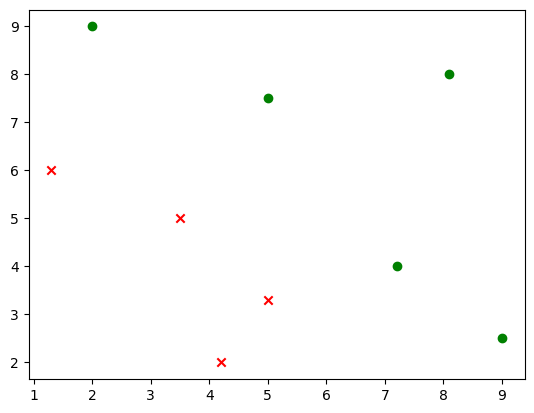

In [14]:
plt.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], c='red', marker='x')
plt.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], c='green', marker='o')
plt.show()

In [13]:
# 加入一个新样本点
data_new = np.array([4, 5])

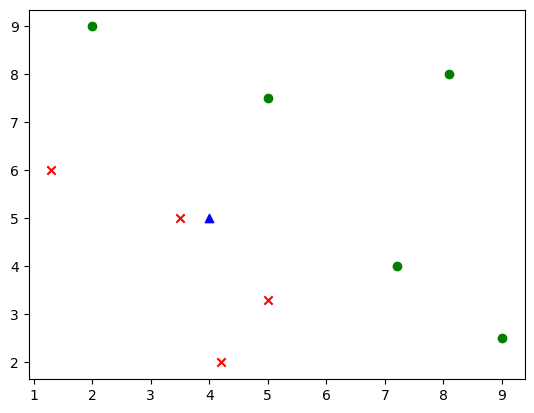

In [15]:
plt.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], c='red', marker='x')
plt.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], c='green', marker='o')
plt.scatter(data_new[0], data_new[1], c='blue', marker='^')
plt.show()

## 1.2 计算新样本点与已知样本点的距离

In [16]:
for data in X_train:
    print(np.sqrt(np.sum((data-data_new)**2)))

2.879236009777594
0.5
3.006659275674582
1.9723082923316022
4.47213595499958
2.692582403567252
3.3526109228480423
5.080354318352215
5.5901699437494745


In [19]:
distances = [np.sqrt(np.sum((data-data_new)**2)) for data in X_train]
distances

[2.879236009777594,
 0.5,
 3.006659275674582,
 1.9723082923316022,
 4.47213595499958,
 2.692582403567252,
 3.3526109228480423,
 5.080354318352215,
 5.5901699437494745]

## 1.3 按距离排序

In [21]:
np.sort(distances)

array([0.5       , 1.97230829, 2.6925824 , 2.87923601, 3.00665928,
       3.35261092, 4.47213595, 5.08035432, 5.59016994])

In [22]:
# 排序显示序号
sort_index = np.argsort(distances)
sort_index

array([1, 3, 5, 0, 2, 6, 4, 7, 8], dtype=int64)

## 1.4 确定k值

In [23]:
k = 5 # 按照离得最近的5个点进行划分

## 1.5 距离最近的k个点投票

In [24]:
first_k = [y_train[i] for i in sort_index[:k]]
first_k

[0, 0, 1, 0, 0]

In [27]:
# 用字典统计哪个类型最多
from collections import Counter
Counter(first_k)

Counter({0: 4, 1: 1})

In [28]:
# 把键值对改成元组
Counter(first_k).most_common()

[(0, 4), (1, 1)]

In [29]:
# 选出value值最大的一组
Counter(first_k).most_common(1)

[(0, 4)]

In [30]:
predict_y = Counter(first_k).most_common(1)[0][0]
predict_y

0

# 2. scikit_learn中的KNN算法

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [34]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
data_new

array([4, 5])

In [36]:
data_new.reshape(1, -1)

array([[4, 5]])

In [37]:
knn_classifier.predict(data_new.reshape(1,-1))

array([0])